In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [9]:
x,y = sklearn.datasets.make_moons(200, noise = 0.2)

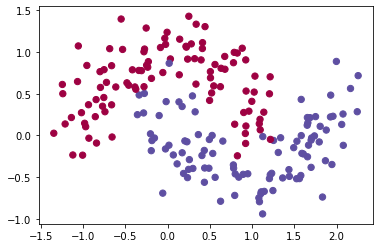

In [10]:
plt.scatter(x[:,0],x[:,1], s = 40, c= y, cmap = plt.cm.Spectral)
plt.show()

In [11]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [13]:
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x


In [16]:
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(),lr = 0.02)
loss_function = nn.CrossEntropyLoss()

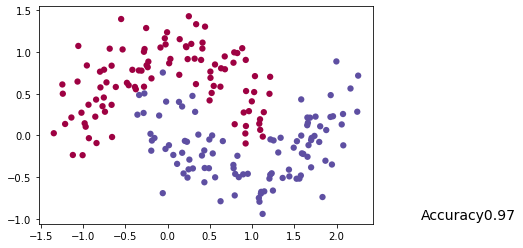

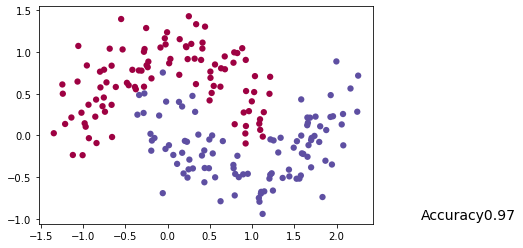

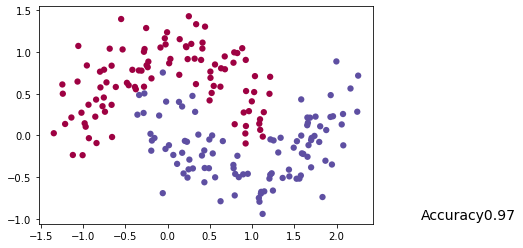

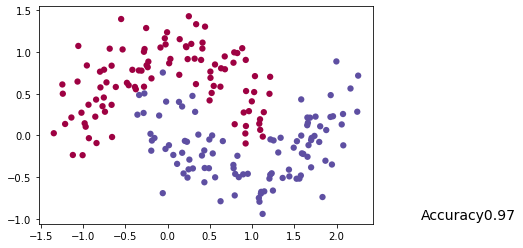

In [ ]:
epochs = 1000
for epoch in range(epochs):
    out = network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        # show the learning process until now
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c= predicted_y, cmap = plt.cm.Spectral, lw = 0)
        accuracy = (predicted_y == target_y).mean()
        plt.text(3, -1, f'Accuracy{accuracy:.2f}', fontdict={'size': 14})
        plt.show()